This Jupyter notebook plots a set of data and performs the following: 

Scales the data by [2,1] in the xy-axis 

Rotates the data by $\frac{\pi}{3}$

Plots the data and computes the mean of all rows and substracts it from X

$\bar{x}_{j} = \frac{1}{n}\Sigma_{i=1}^{n}X_{ij}$

Computes the mean matrix
$\begin{equation}
\bar{X} = \left[
  \begin{array}{cccc}
  1 \\
  1 \\
  . \\
  . \\
  . \\
  1 
  \end{array}
\right] \bar{x}
\end{equation}$

Substracts the mean so that the center point of the dataset is at the origin

$\begin{equation}
B = X - \bar{X}
\end{equation}$


Computes the Principal Components of the Data set using the SVD:

U Rotation Matrix and $\Sigma$ scaling factor




Size of Matrix X: (2, 10000)
Size of Matrix Xavg: (2,)
Size of Matrix B: (2, 10000)
Size of Matrix U :(2, 2)
Size of Matrix S :(2,)
Size of Matrix VT :(2, 10000)


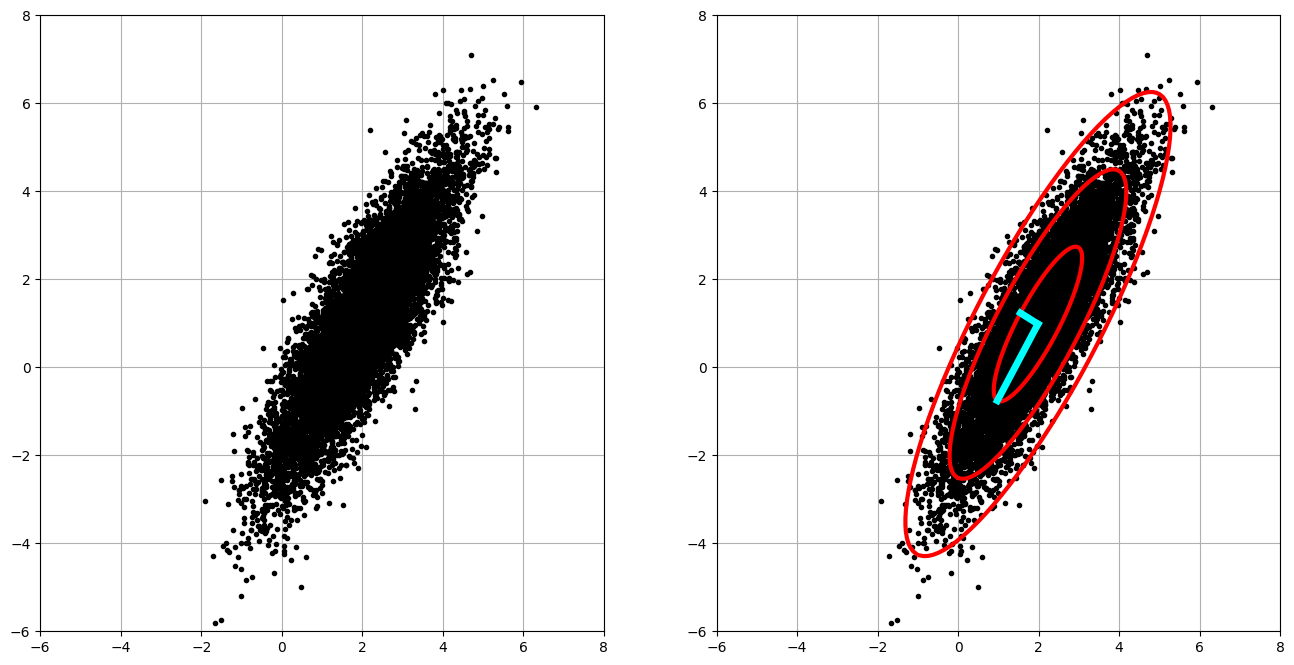

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

# Center of data (mean)
xC = np.array([2, 1])

# Principal axes
sig = np.array([2, 0.5])

# Rotate cloud by pi/3
theta = np.pi/3            

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],     
              [np.sin(theta), np.cos(theta)]])

# Create 10,000 points
nPoints = 10000            
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
print("Size of Matrix X: " + str(X.shape))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

# Compute mean
Xavg = np.mean(X,axis=1)
print("Size of Matrix Xavg: " + str(Xavg.shape))

# Mean-subtracted
B = X - np.tile(Xavg,(nPoints,1)).T       
print("Size of Matrix B: " + str(B.shape))

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)
print("Size of Matrix U :" + str(U.shape))
print("Size of Matrix S :" + str(S.shape))
print("Size of Matrix VT :" + str(VT.shape))

# Plot data to overlay PCA
ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()

